Back to **[Fan](https://fanwangecon.github.io/)**'s R4Econ Homepage **[Table of Content](https://fanwangecon.github.io/R4Econ/)**

# By Group, Count non-NA observations of All Variables

Within groups, the number of non-NA observations for some list of variables. 

In some dataset, not all variables are observed at all observations. 

It is often important to check on the number of non-NA values across observations/variables, especially if these variables are to enter some regression together. 

If we see that some variables are not observed much within some groups, we have to consider perhaps not including that variable in regression. 

## Function

This function takes in dataframe and a sym list of grouping variables.

In [25]:
# Data Function
f.by.group.vars.obs <- function (df, group.vars = c('S.country', 'svymthRound'), graph=TRUE) {
    
    df.group <- df %>% group_by(!!!syms(group.vars)) %>%
            arrange(!!!syms(group.vars)) %>%
            summarise_if(is.numeric, funs(sum(is.na(.)==0)))
    
    if (graph){
        graph <- graphf.by.group.vars.obs(df.group, group.vars)
        return(list(df=df.group, graph=graph))
    } else {
        return(list(df=df.group))
    }
}

In [26]:
# Graphing Function
graphf.by.group.vars.obs <- function(df.by.group, group.vars = c('S.country', 'svymthRound')) {
    color.var <- group.vars[1]
    x.var <- group.vars[2]

    # x-var as factor
    df.by.group[[x.var]] <- factor(df.by.group[[x.var]])

    # Graph Size
    options(repr.plot.width = 9, repr.plot.height = 10)

    # Titling
    graph.title <- sprintf('Number of Observations Each Variable By (%s and %s) Groups', 
                           color.var, x.var)
    graph.caption <- sprintf(
        paste0('Jitter/Random Hgt/Wgt Guat/Cebu Data\n',
               'see:https://fanwangecon.github.io/HeightProfile/'))
    graph.title.x <- 'Month Groups'
    graph.title.y <- 'Number of Observations'

    # Graphing
    graph <- df.by.group %>% 
        gather(variable, value, -one_of(group.vars)) %>% 
        ggplot(aes(x=!!sym(x.var), y=value, fill=!!sym(color.var))) + 
        geom_bar(stat = 'identity', position="dodge") + 
        facet_wrap( ~ variable, ncol=2) + 
        labs(title = graph.title,
             x = graph.title.x, y = graph.title.y,
             caption = graph.caption) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))
    
    return(graph)
}

## Data

In our sample dataset, the number of nutrition/height/income etc information observed within each country and month of age group are different. 

We have a panel dataset for children observed over different months of age. 

We have two key grouping variables:
1. country: data are observed for guatemala and cebu
2. month-age (survey month round=svymthRound): different months of age at which each individual child is observed

A child could be observed for many months, or just a few months. A child's height information could be observed for more months-of-age than nutritional intake information. 

We eventually want to run regressions where the outcome is height/weight and the input is nutrition. The regressions will be at the month-of-age level. We need to know how many times different variables are observed at the month-of-age level.

In [27]:
# Library
library(tidyverse)

# Load Sample Data
setwd('C:/Users/fan/R4Econ/_data/')
df <- read_csv('height_weight.csv')

Parsed with column specification:
cols(
  S.country = col_character(),
  vil.id = col_double(),
  indi.id = col_double(),
  sex = col_character(),
  svymthRound = col_double(),
  momEdu = col_double(),
  wealthIdx = col_double(),
  hgt = col_double(),
  wgt = col_double(),
  hgt0 = col_double(),
  wgt0 = col_double(),
  prot = col_double(),
  cal = col_double(),
  p.A.prot = col_double(),
  p.A.nProt = col_double()
)


## Use Function with Data

The results below show that:

1. data in guatemala and cebu are observed at different months. 
2. there are some age-months in which data is observed in both Guatemala and Cebu

In [28]:
group.vars <- c('S.country', 'svymthRound')
group.vars.obs.df <- f.by.group.vars.obs(df, group.vars)

### Table

This is the tabular version of results

In [29]:
group.vars.obs.df$df

S.country,svymthRound,vil.id,indi.id,momEdu,wealthIdx,hgt,wgt,hgt0,wgt0,prot,cal,p.A.prot,p.A.nProt
Cebu,0,1343,1343,1343,1343,1341,1341,1341,1341,1343,1343,1238,1238
Cebu,2,1343,1343,1343,1343,1319,1319,1341,1341,1320,1320,1205,1205
Cebu,4,1343,1343,1343,1343,1326,1328,1341,1341,1328,1328,1218,1218
Cebu,6,1343,1343,1343,1343,1343,1343,1341,1341,1342,1342,1243,1243
Cebu,8,1343,1343,1343,1343,1293,1292,1341,1341,1294,1294,1195,1195
Cebu,10,1343,1343,1343,1343,1274,1276,1341,1341,1277,1277,1167,1167
Cebu,12,1343,1343,1343,1343,1259,1259,1341,1341,1260,1260,1142,1142
Cebu,14,1343,1343,1343,1343,1238,1238,1341,1341,1239,1239,1133,1133
Cebu,16,1343,1343,1343,1343,1213,1214,1341,1341,1215,1215,1123,1123
Cebu,18,1343,1343,1343,1343,1203,1205,1341,1341,1205,1205,1118,1118


### Graph

This is the graphical version of results

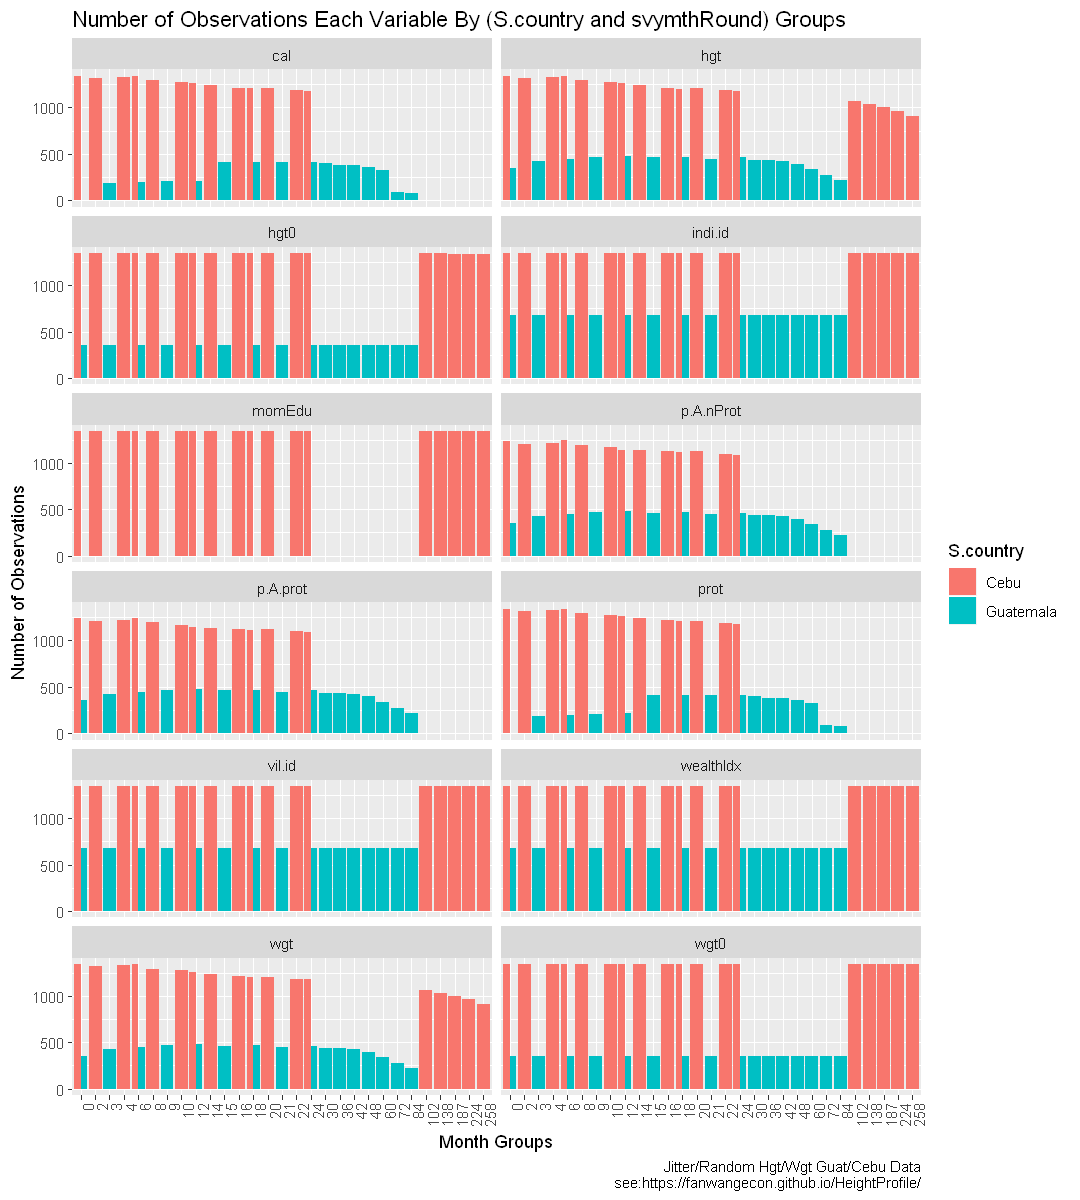

In [30]:
group.vars.obs.df$graph